### MLB Ballpark Research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

### Research Question

Will stadiums with smaller outfield distances be easier to hit HR, or in another word, will stadiums with larger distances will be more difficult to hit a HR? <br> <br>
Why this question? There are two main reasons: <br>
1. It could help coaches to design a better strategy when playing in different ballparks.
2. It could help sportsbook companies to decide odd.

### Data Cleaning

In [2]:
hr_count = pd.read_csv("data/21-23hr.csv")
ballpark = pd.read_csv("data/ballparks.csv")

In [3]:
hr_count.head()

,ballpark,city,2023,2022,2021
0,Globe Life Field,Arlington,256,198,194
1,Truist Park,Atlanta,250,190,210
2,Great American Ball Park,Cincinnati,243,217,250
3,Dodger Stadium,Los Angeles,238,196,231
4,Yankee Stadium,Bronx,231,207,219


In [4]:
ballpark.head()

,team_name,ballpark,left_field,center_field,right_field,min_wall_height,max_wall_height,hr_park_effects,extra_distance,avg_temp,elevation,roof,daytime
0,ATL,Truist Park,335,400,325,11.0,15,99,1.8,79.2,1001,0.00,0.31
1,AZ,Chase Field,328,407,335,7.6,25,84,13.2,80.8,1086,0.81,0.31
2,BAL,Oriole Park,333,400,318,7.0,21,107,-0.5,76.4,33,0.00,0.35
3,BOS,Fenway Park,310,420,302,3.0,37,102,-4.7,69.5,21,0.00,0.31
4,CHC,Wrigley Field,355,400,353,11.5,15,97,-3.4,70.2,595,0.00,0.55


In [5]:
hr_count.isnull().sum()

ballpark    0
city        0
2023        0
2022        0
2021        0
dtype: int64

In [6]:
ballpark.isnull().sum()

team_name          0
ballpark           0
left_field         0
center_field       0
right_field        0
min_wall_height    0
max_wall_height    0
hr_park_effects    0
extra_distance     0
avg_temp           0
elevation          0
roof               0
daytime            0
dtype: int64

I will create a new dataframe, which has 6 columns which are : [team, stadium, lf, cf, rf, hr] <br>
team: team name; stadium: team stadium name; lf: left field distance; cf: center field distance; rf: right field distance;
rf: right field distance; hr: HR per game in this stadium from 2021 to 2023 <br>
Every stadium should hold 81 games in each season. However, in 2021 Torento Blue Jays only jave 32 home games, and in 2023, San Diego Padres and St. Louis Cardinals only have 79 home games due to international series. This is why I choose to use HR per game instead of HR number. <br>

In [7]:
hr_lst = []
for i in hr_count["ballpark"]:
    df = hr_count[hr_count["ballpark"] == i]
    if i == "Petco Park":
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (81 + 81 + 79)
    if i == "Busch Stadium":
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (81 + 81 + 79)
    if i == "Rogers Centre":
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (81 + 81 + 32)
    hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (3 * 81)
    hr_lst.append(hr)
hr_count["hr"] = hr_lst

In [8]:
hr_count.head()

,ballpark,city,2023,2022,2021,hr
0,Globe Life Field,Arlington,256,198,194,2.666667
1,Truist Park,Atlanta,250,190,210,2.674897
2,Great American Ball Park,Cincinnati,243,217,250,2.921811
3,Dodger Stadium,Los Angeles,238,196,231,2.736626
4,Yankee Stadium,Bronx,231,207,219,2.703704


In [9]:
left_df = ballpark[["team_name", "ballpark", "left_field", "center_field", "right_field"]]
right_df = hr_count[["ballpark", "hr"]]

In [10]:
df = left_df.merge(right_df, left_on = "ballpark", right_on = "ballpark")
df.head()

,team_name,ballpark,left_field,center_field,right_field,hr
0,ATL,Truist Park,335,400,325,2.674897
1,AZ,Chase Field,328,407,335,1.975309
2,BAL,Oriole Park,333,400,318,2.469136
3,BOS,Fenway Park,310,420,302,2.341564
4,CHC,Wrigley Field,355,400,353,2.473251


In [11]:
df.columns = ["team", "stadium", "lf", "cf", "rf", "hr"]
df.head()

,team,stadium,lf,cf,rf,hr
0,ATL,Truist Park,335,400,325,2.674897
1,AZ,Chase Field,328,407,335,1.975309
2,BAL,Oriole Park,333,400,318,2.469136
3,BOS,Fenway Park,310,420,302,2.341564
4,CHC,Wrigley Field,355,400,353,2.473251


In [12]:
# add all the features' values to the last row
avg_row = ["AVG", "NA"]
for i in range(0, 4):
    avg_row.append(df.describe().loc["mean"][i])
df.loc[30] = avg_row

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2388\531786877.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_row.append(df.describe().loc["mean"][i])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2388\531786877.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_row.append(df.describe().loc["mean"][i])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2388\531786877.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

In [13]:
df = df.round(2)
df.head()

,team,stadium,lf,cf,rf,hr
0,ATL,Truist Park,335.0,400.0,325.0,2.67
1,AZ,Chase Field,328.0,407.0,335.0,1.98
2,BAL,Oriole Park,333.0,400.0,318.0,2.47
3,BOS,Fenway Park,310.0,420.0,302.0,2.34
4,CHC,Wrigley Field,355.0,400.0,353.0,2.47


### EDA

I will get top and bottom 5 team/stadium in HR and oyt field distances in two dataframes to see whether these teams are corrsponding. <br>

In [14]:
def get_5(value, order):
    df5 = df.sort_values(by = value, ascending = (order == "bottom"), inplace = False).head()
    return list(df5.iloc[:, 0])

In [15]:
# top 5 teams in hr and bottom 5 teams in lf, cf, and rf
top_5_hr_teams = pd.DataFrame(columns = ["hr", "lf", "cf", "rf"])
top_5_hr_teams["hr"] = get_5("hr", "top")
top_5_hr_teams["lf"] = get_5("lf", "bottom")
top_5_hr_teams["cf"] = get_5("cf", "bottom")
top_5_hr_teams["rf"] = get_5("rf", "bottom")
top_5_hr_teams

,hr,lf,cf,rf
0,CIN,BOS,LAD,BOS
1,LAD,TB,SD,SF
2,NYY,HOU,LAA,NYY
3,ATL,NYY,SF,BAL
4,TEX,CLE,PIT,PIT


In [16]:
# bottom 5 teams in hr and top 5 teams in lf, cf, and rf
bottom_5_hr_teams = pd.DataFrame(columns = ["hr", "lf", "cf", "rf"])
bottom_5_hr_teams["hr"] = get_5("hr", "bottom")
bottom_5_hr_teams["lf"] = get_5("lf", "top")
bottom_5_hr_teams["cf"] = get_5("cf", "top")
bottom_5_hr_teams["rf"] = get_5("rf", "top")
bottom_5_hr_teams

,hr,lf,cf,rf
0,PIT,CHC,BOS,CHC
1,DET,COL,DET,COL
2,SF,DET,COL,MIL
3,MIA,MIL,KC,AZ
4,AZ,MIA,HOU,WSH


From the above two tables, we can see that some teams do appear in a same table. <br>

It is always useful to create some graphs to figure out is there any relationship between different variables.

In [17]:
# help functions to draw figure
def rank(var):
    new_df = df.iloc[0: 30]
    sorted_df = new_df.sort_values(by = var)
    return sorted_df

def get_max(var):
    rank_df = rank(var)
    return rank_df[var].iloc[-1]

def get_min(var):
    rank_df = rank(var)
    return rank_df[var].iloc[0]

def get_avg(var):
    return df[var].iloc[30]

# paint function
def draw(x, y):
    sns.set_theme()
    fig = plt.figure(figsize = (18, 10))
    fig = sns.scatterplot(data = df, x = x, y = y, hue = "team", s = 50)
    min_x = get_min(x)
    max_x = get_max(x)
    avg_x = get_avg(x)
    min_y = get_min(y)
    max_y = get_max(y)
    avg_y = get_avg(y)
    x_gap = (int(max_x) + 1 - int(min_x) + 1) / 20
    y_gap = (max_y - min_y) / 10
    fig.set_xticks(np.arange(min_x - x_gap, max_x + x_gap, x_gap))
    fig.set_yticks(np.arange(min_y - y_gap, max_y + y_gap, y_gap))
    fig = sns.lineplot(x = [min_x, max_x], y = avg_y, color = "blue", linewidth = 1, label = "league average HR")
    fig = sns.lineplot(x = avg_x, y = [min_y, max_y], color = "red", label = "league average LF distance")
    fig.set(xlabel = x, ylabel = y, title = x + "-" + y + " graph")
    for i in range(0, df.shape[0]):
        x_index = df[x].iloc[i]
        y_index = df[y].iloc[i]
        team = df["team"].iloc[i]
        fig.text(x_index - x_gap / 2, y_index, team)
    sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

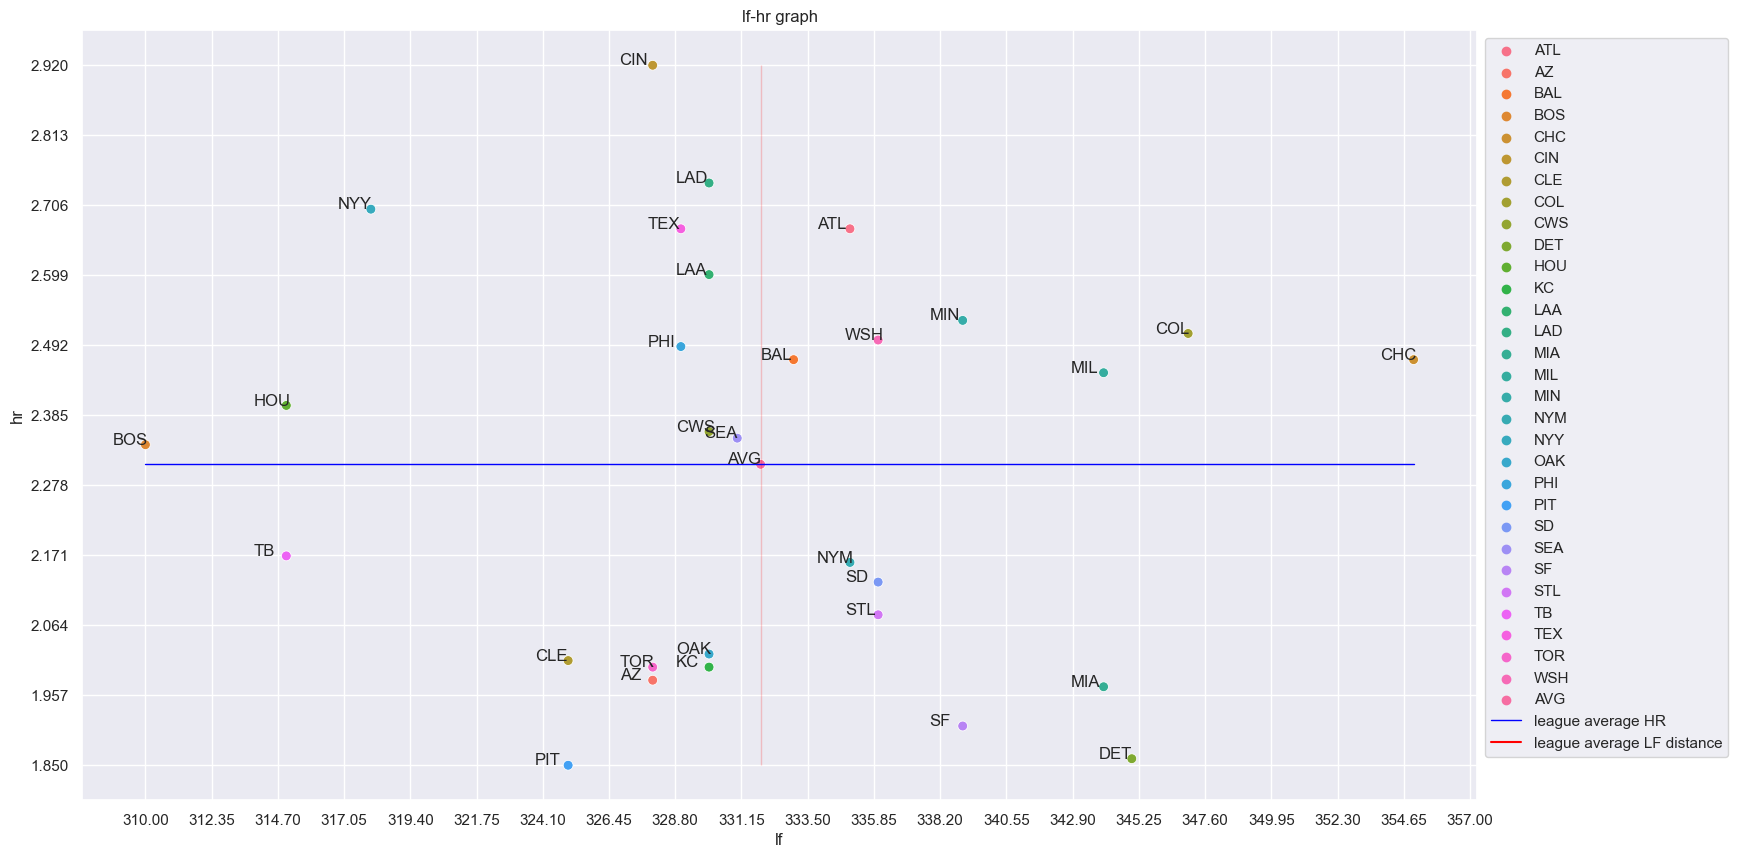

In [18]:
# x = lf, y = hr
draw("lf", "hr")

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

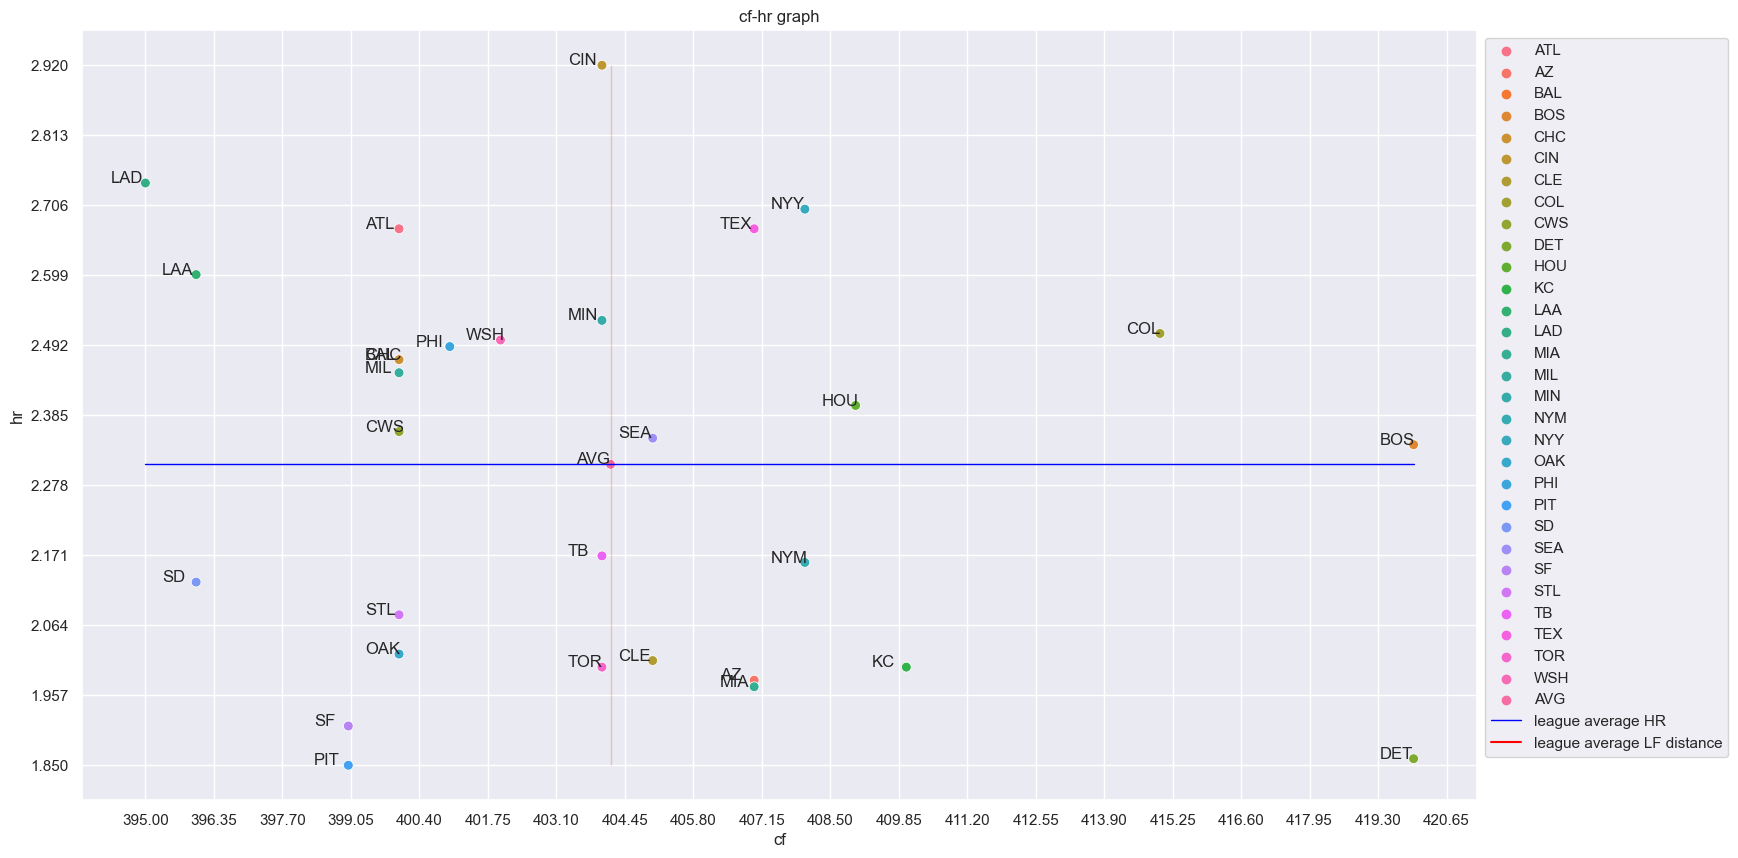

In [19]:
# x = cf, y = hr
draw("cf", "hr")

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

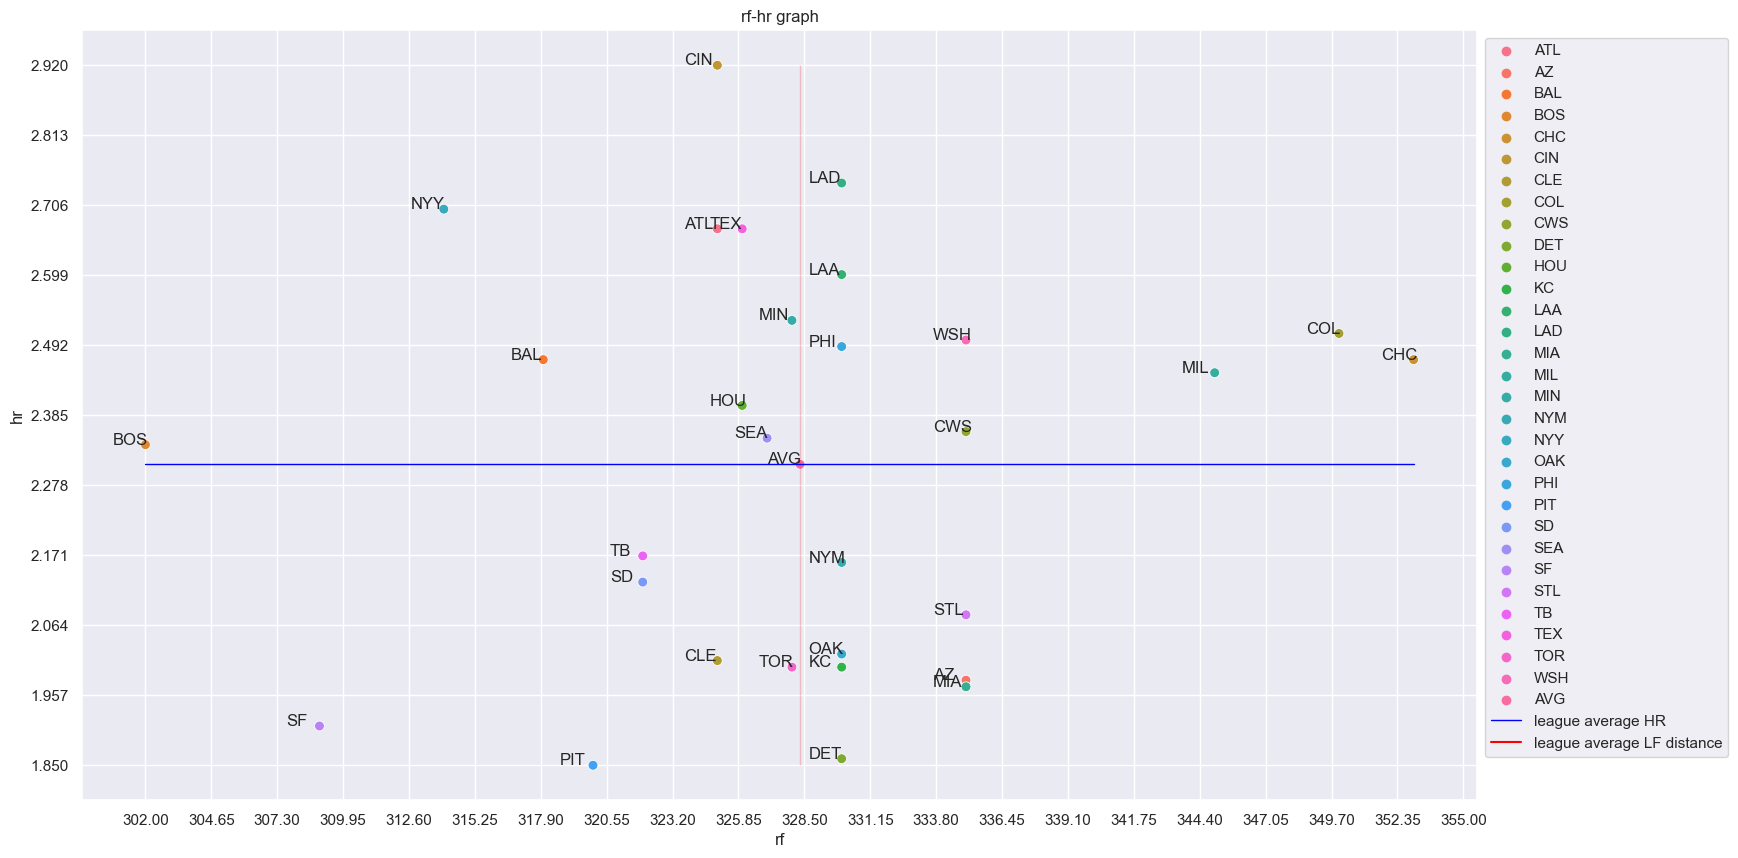

In [20]:
# x = rf, y = hr
draw("rf", "hr")

From the above three graphs, there is no obvious linear relation that we may want to see or expect. However, if we let the point AVG be the original point in a coordinate. We can find out that there is some different in the distribution of the four quadrants. In the following I will find out the number and ratio in each graph and analyze it.

In [21]:
# this will method will return a list with 4 values: number of team's var > avg_var and hr > avg_hr,
# number of team's var < avg_var and hr > avg_hr, number of team's var < avg_var and hr < avg_hr,
# and number of team's var > avg_var and hr < avg_hr,
def get_quadrant(var):
    var_avg = get_avg(var)
    hr_avg = get_avg("hr")
    q1 = df[(df[var] > var_avg) & (df["hr"] > hr_avg)].shape[0]
    q2 = df[(df[var] < var_avg) & (df["hr"] > hr_avg)].shape[0]
    q3 = df[(df[var] < var_avg) & (df["hr"] < hr_avg)].shape[0]
    q4 = df[(df[var] > var_avg) & (df["hr"] < hr_avg)].shape[0]
    return [q1, q2, q3, q4]

In [22]:
# this method will create a dataframe with the given variable
def ratio_table(var):
    [q1, q2, q3, q4] = get_quadrant(var)
    r1 = round(q2 / (q2 + q3), 4) * 100
    r2 = round(q3 / (q2 + q3), 4) * 100
    r3 = round(q1 / (q1 + q4), 4) * 100
    r4 = round(q4 / (q1 + q4), 4) * 100
    col = [var + "-hr", ">avg_" + var, "<avg_" + var]
    ratio_df = pd.DataFrame(columns = col)
    ratio_df.iloc[:, 0] = [">avg_hr", "<avg_hr", "diff"]
    ratio_df.iloc[:, 1] = [per(r3), per(r4), per(r3 - r4)]
    ratio_df.iloc[:, 2] = [per(r1), per(r2), per(r1 - r2)]
    return ratio_df

def per(num):
    num = "{:.2f}%".format(num)
    return num

In [23]:
lf_hr_ratio = ratio_table("lf")
cf_hr_ratio = ratio_table("cf")
rf_hr_ratio = ratio_table("rf")

In [24]:
display(HTML(
    f"""
    <div style="display: flex; justify-content: space-around;">
        <div style="margin-right: 20px;">
            <h5>LF-HR Table</h5>
            {lf_hr_ratio.to_html(index=False)}
        </div>
        <div>
            <h5>CF-HR Table</h5>
            {cf_hr_ratio.to_html(index=False)}
        </div>
        <div>
            <h5>RF-HR Table</h5>
            {rf_hr_ratio.to_html(index=False)}
        </div>
    </div>
    """
))

lf-hr,>avg_lf,<avg_lf
>avg_hr,53.85%,58.82%
<avg_hr,46.15%,41.18%
diff,7.70%,17.64%
cf-hr,>avg_cf,<avg_cf
>avg_hr,50.00%,61.11%
<avg_hr,50.00%,38.89%
diff,0.00%,22.22%
rf-hr,>avg_rf,<avg_rf
>avg_hr,53.33%,60.00%
<avg_hr,46.67%,40.00%


The above three tables present the percentage of teams that have more or less HR per game compared to league vaerage in different out field distance situations. Take the first column of LF-HR Table as an example. Take the first column of LF-HR Table as an example. 53.85% means 53.85% teams hit more HR per game than league average among teams with LF distance larger than league average value. 46.15% means 46.15% teams hit less HR per game than league average value among teams with LF distance larger than league average value. 7.70% is the difference between two previous values. What we expected is that number of teams hitting more HR per game than average value among teams with larger out field distance than league average should be less than number of teams hitting less HR per game than average value among teams with larger out field distance than league average, which means in the three table, the first difference should be less than 0. However, the real difference is larger or equal than 0. Why does this unexpectations come? In the following, I will discuss some other features that influence HR and some special cases.

1. Teams with larger OF distance than league average but with larger HR per game than league average

In [25]:
# get teams that satisfy the condition in each case
def large_of_hr(var):
    avg_var = get_avg(var)
    avg_hr = get_avg("hr")
    new_df = df[(df[var] > avg_var) & (df["hr"] > avg_hr)]
    return list(new_df["team"])

In [26]:
(large_of_hr("lf"), large_of_hr("cf"), large_of_hr("rf"))

(['ATL', 'BAL', 'CHC', 'COL', 'MIL', 'MIN', 'WSH'],
 ['BOS', 'COL', 'HOU', 'NYY', 'SEA', 'TEX'],
 ['CHC', 'COL', 'CWS', 'LAA', 'LAD', 'MIL', 'PHI', 'WSH'])

From the above three lists, there is an interesting team-Colorado Rockies. Its stadium's LF, Cf, and RF distances are all larger than league average values, but its HR per game is also larger than league average value. By doing a further research, we can find out that Coors Field, Colorado Rockies' home ballpark, has the highest elevation, 5186 feet, which is the highest stadium. In comparison, the second highest ballpark is Chase Field, Arizona Diamondbacs' home stadium, which is 1061 feet, and the lowest ballpark is Citizen Bank Park, Philadelphia Phillies' home stadium, which is only 20 feet. From those number, we can find out that in elevation Coors Field has a big difference compared to other stadiums and it may provide a huge advantage for hitters to hit HR, since with higher elevation, the air pressure will reduce, offering less resistance to the ball. Therefore, the ball may fly higher and further. This is also why Coors Field has been regraded as hitters' paradise. <br>

2. Teams with most and least HR per game

In [27]:
least_hr_team = df.sort_values(by = "hr", ascending = True).iloc[0, 0]
most_hr_team = df.sort_values(by = "hr", ascending = False).iloc[0, 0]
df.loc[(df["team"] == least_hr_team) | (df["team"] == most_hr_team) | (df["team"] == "AVG")]

,team,stadium,lf,cf,rf,hr
5,CIN,Great American Ball Park,328.00,404.00,325.00,2.92
21,PIT,PNC Park,325.00,399.00,320.00,1.85
30,AVG,NA,331.83,404.17,328.33,2.31


From the table above we can find out that Cincinnati Reds can hit more than 1 HR per game than Pittsburgh Pirates. However, if we look at their outfield distance, there is no big difference. Hence, what cause this result? Here, we need to understand that players or hitters is the largest factor that influence HR. Although, for a stadium, different teams will come to play, the home team plays most games at the home stadium. In the following, the dataframe will present the two teams average HR per game in home stadium from 2021 to 2023.

In [28]:
cin_pit_df = pd.read_csv("data/CIN_PIT.csv")
cin_pit_df

,team/year,CIN,PIT
0,2021,1.59,0.72
1,2022,1.11,0.91
2,2023,1.33,0.81


In [29]:
cin_avg = round(np.mean(cin_pit_df.loc[:, ["CIN"]]), 2)
pit_avg = round(np.mean(cin_pit_df.loc[:, ["PIT"]]), 2)

In [30]:
(cin_avg, pit_avg)

(1.34, 0.81)

We do see a 0.5 HR per game difference by the home team.

### Conclusion

If we only look at the outfield distance, it may not provide advantage or disvantage to players to hit a HR from the graph and analysis done before. Instead, maybe with further analysis, the elevation and home team players' hitting power may be more influential on the HR number.